# Pandas cookbook
http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/tree/v0.1/cookbook/

## Chapter 1 - Reading from csv

In [ ]:
import pandas as pd
import os
os.getcwd()

In [ ]:
broken_df = pd.read_csv(".\\data\\bikes.csv")

In [ ]:
broken_df[3:]

In [ ]:
fix_df = pd.read_csv('./data/bikes.csv', sep = ';', encoding = 'utf-8', parse_dates= ['Date'],
                        dayfirst=True, index_col = 'Date')

In [ ]:
fix_df['Berri 1'].plot()

In [ ]:
fix_df.plot(figsize=(8, 8))

## 2. Select & find

In [ ]:
import pandas as pd
complaints = pd.read_csv('./data/311-service-requests.csv', low_memory = False)


In [ ]:
# pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 50) 

In [ ]:
complaints[:5]

In [ ]:
complaints[["Complaint Type", "Borough"]]

In [ ]:
complaints["Borough"].value_counts().plot(kind = 'bar')

## 3. More selecting data

In [ ]:
import pandas as pd

In [ ]:
complaints = pd.read_csv('./data/311-service-requests.csv', low_memory = False)

In [ ]:
noise_complaints = complaints[complaints["Complaint Type"] == 'Noise - Street/Sidewalk']

In [ ]:
noise_complaints.head()

In [ ]:
noise_complaints_ct = noise_complaints["Borough"].value_counts()
complaints_ct = complaints["Borough"].value_counts()
complaints.groupby(["Borough", "Agency"]).size()

In [ ]:
(noise_complaints_ct / complaints_ct).plot(kind = 'bar')

## 4. Grouping

In [ ]:
import pandas as pd
bikes = pd.read_csv('./data/bikes.csv', sep = ';', encoding = 'utf-8', parse_dates= ['Date'],
                        dayfirst=True, index_col = 'Date')

In [ ]:
berri = bikes[['Berri 1']]

In [ ]:
berri['weekday'] = berri.index.weekday

In [ ]:
weekday_berri = berri.groupby('weekday').sum()
weekday_berri.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'San']

In [ ]:
weekday_berri.plot(kind = 'bar')

## 5 Scrap scrap scrap!

In [ ]:
complaints[complaints["Complaint Type"].str.contains('Noise')]["Borough"].value_counts().plot(kind = 'bar')

## 6 Data munging

In [1]:
import pandas as pd
import numpy as np

In [6]:
%matplotlib inline

In [7]:
weather_2012 = pd.read_csv('./data/weather_2012.csv', parse_dates= True, index_col= 'Date/Time')

In [8]:
isSnowing = weather_2012["Weather"].str.contains('Snow')

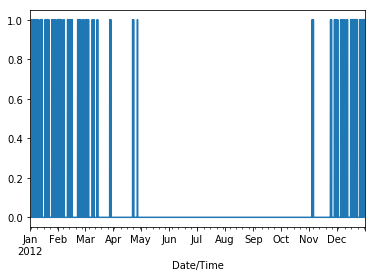

In [10]:
# not working
isSnowing.plot()

In [51]:
weather_2012

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog


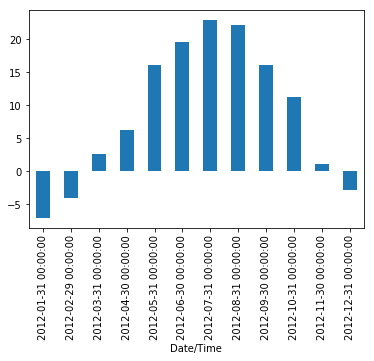

In [12]:
weather_2012['Temp (C)'].resample('M').apply(np.median).plot(kind = 'bar')

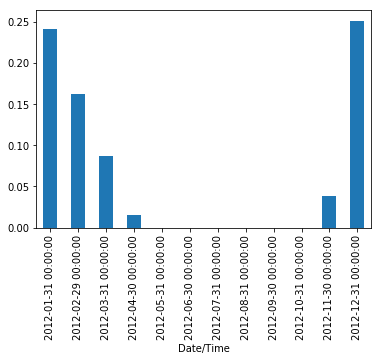

In [28]:
isSnowing.astype(float).resample('M').apply(np.mean).plot(kind = 'bar')

In [29]:
snowiness = isSnowing.astype(float).resample('M').apply(np.mean)
temp = weather_2012['Temp (C)'].resample('M').apply(np.median)

temp.name = 'Temperature'
snowiness.name = 'Snowiness'

In [34]:
stats = pd.concat([temp, snowiness], axis = 1)
print(stats)

            Temperature  Snowiness
Date/Time                         
2012-01-31        -7.05   0.240591
2012-02-29        -4.10   0.162356
2012-03-31         2.60   0.087366
2012-04-30         6.30   0.015278
2012-05-31        16.05   0.000000
2012-06-30        19.60   0.000000
2012-07-31        22.90   0.000000
2012-08-31        22.20   0.000000
2012-09-30        16.10   0.000000
2012-10-31        11.30   0.000000
2012-11-30         1.05   0.038889
2012-12-31        -2.85   0.251344


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000196E85592B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000196E8580D68>], dtype=object)

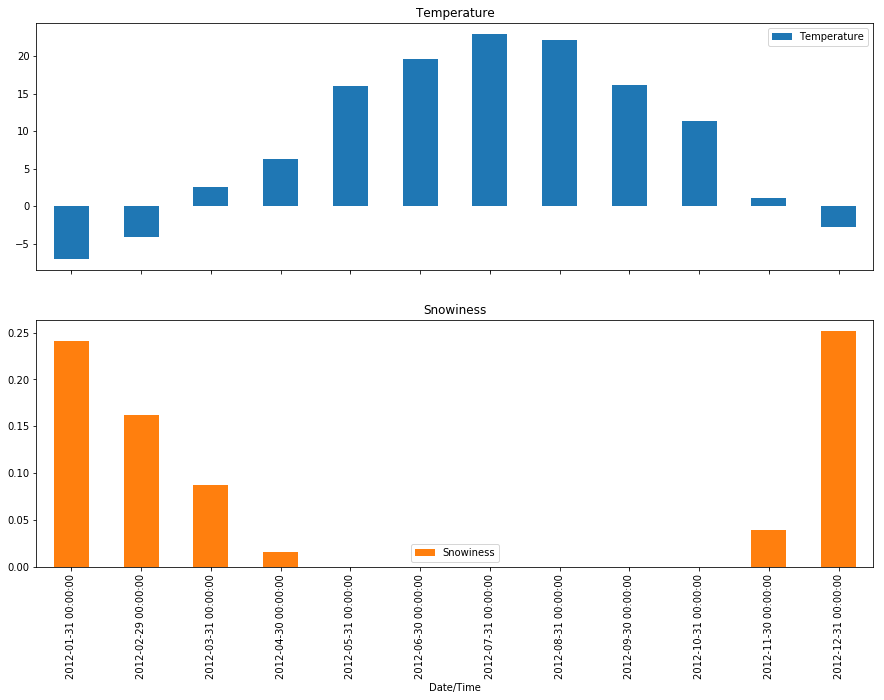

In [40]:
stats.plot(kind = 'bar', subplots = True, figsize = (15, 10))

## 7. Cleaning messy data

In [41]:
import pandas as pd

In [54]:
na_val = ['NO CLUE', 'N/A', '0']
req = pd.read_csv('./data/311-service-requests.csv', low_memory = False, na_values=na_val, 
                  dtype={'Incident Zip': str})

In [52]:
req['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

In [57]:
def fix_zip(zips):
    zips = zips.str.slice(0,5)
    
    zero_zips = zips == '00000'
    zips[zero_zips] = np.nan
    return zips

In [59]:
req['Incident Zip'] = fix_zip(req['Incident Zip'])

In [61]:
req['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

## 7. Timestamps

In [62]:
import pandas as pd

In [64]:
popcon = pd.read_csv('./data/popularity-contest.txt', sep = ' ')[:-1]

In [66]:
popcon.columns = ['atime', 'ctime', 'package-name', 'mru-program', 'tag']

In [70]:
popcon['atime'] = popcon['atime'].astype(int)
popcon['ctime'] = popcon['ctime'].astype(int)


In [73]:
popcon['atime'] = pd.to_datetime(popcon['atime'], unit = 's')
popcon['ctime'] = pd.to_datetime(popcon['ctime'], unit = 's')

In [78]:
popcon = popcon[popcon['atime'] > '1970-01-01']

In [88]:
nonlib = popcon[~popcon['package-name'].str.contains('lib')]
nonlib.sort_values('ctime', ascending = False)[:10]

,atime,ctime,package-name,mru-program,tag
57,2013-12-17 04:55:39,2013-12-17 04:55:42,ddd,/usr/bin/ddd,<RECENT-CTIME>
450,2013-12-16 20:03:20,2013-12-16 20:05:13,nodejs,/usr/bin/npm,<RECENT-CTIME>
454,2013-12-16 20:03:20,2013-12-16 20:05:04,switchboard-plug-keyboard,/usr/lib/plugs/pantheon/keyboard/options.txt,<RECENT-CTIME>
445,2013-12-16 20:03:20,2013-12-16 20:05:04,thunderbird-locale-en,/usr/lib/thunderbird-addons/extensions/langpac...,<RECENT-CTIME>
396,2013-12-16 20:08:27,2013-12-16 20:05:03,software-center,/usr/sbin/update-software-center,<RECENT-CTIME>
449,2013-12-16 20:03:20,2013-12-16 20:05:00,samba-common-bin,/usr/bin/net.samba3,<RECENT-CTIME>
397,2013-12-16 20:08:25,2013-12-16 20:04:59,postgresql-client-9.1,/usr/lib/postgresql/9.1/bin/psql,<RECENT-CTIME>
398,2013-12-16 20:08:23,2013-12-16 20:04:58,postgresql-9.1,/usr/lib/postgresql/9.1/bin/postmaster,<RECENT-CTIME>
452,2013-12-16 20:03:20,2013-12-16 20:04:55,php5-dev,/usr/include/php5/main/snprintf.h,<RECENT-CTIME>
440,2013-12-16 20:03:20,2013-12-16 20:04:54,php-pear,/usr/share/php/XML/Util.php,<RECENT-CTIME>
